## Part 1: Model a deep feed forward network for regression.


In [5]:
#import necessary libaries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mean_squared_error as mse
import matplotlib.pyplot as plt
import numpy as np

In [23]:
#create a function that create Nt 
def create_data(Nt:int,noise:bool=False,mu=0,std=0):
    X = []
    y = []
    for t in range(Nt):
        x1,x2,x3,x4,x5,x6,x7,x8 = np.random.rand(8) #create 8 random number range [0,1)
        y1 = (1.1)*x1*x2*x3 - 2*x4*x5 - (0.1)*x6*x7*x8 + 2*(x1**2)*x8 + x5
        y2 = x1*x5*x6 - x3*x4 - 3*x2*x3 - (0.2)*(x2**2)*x4 - 2*x7*x8 - 1
        y3 = x3**2 - x5*x7 + 3*x1*x4*x6 - (x1**2)*x2*x4 -1
        y4 = x6**3 - 2-x1*x3*x8 - x1*x4*x7 -2*(x5**2)*x2*x4 - x8
        y5= (x3**2)*x5 - 3*x3*x4*x8 + x1*x2*x4 - 3*x6 + (x1**2)*x7 +2 
        y6 = (x1**2)*x3*x6 - x3*x5*x7 + x1*x3*x4 + (2.2)*x4 + (x2**3)*x3 - 1.1
        X.append([x1,x2,x3,x4,x5,x6,x7,x8])
        y.append([y1,y2,y3,y4,y5,y6])
    X_arr = np.array(X)
    y_arr = np.array(y)
    if noise:
        y_arr = y_arr + np.random.normal(mu,std,y_arr.shape)
    return X_arr,y_arr


In [55]:
#creata dataset
x_train , y_train = create_data(1000,noise=True,mu=0,std=0.001)
x_val , y_val = create_data(260)


In [49]:
#create a model training function

def train(model, x_train,x_val,y_train,y_val,batch_size,epochs):
    history = model.fit(x_train,y_train,epochs=epochs,validation_data=(x_val,y_val))
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot((range(len(train_loss))),train_loss,'r')
    plt.plot((range(len(val_loss))),val_loss,'b')
    plt.legend(['train_loss','val_loss'])
    plt.show()

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6274 - accuracy: 0.2750 - val_loss: 3.6700 - val_accuracy: 0.2962
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5587 - accuracy: 0.2740 - val_loss: 3.5972 - val_accuracy: 0.2962
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4857 - accuracy: 0.2730 - val_loss: 3.5197 - val_accuracy: 0.2962
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4086 - accuracy: 0.2730 - val_loss: 3.4375 - val_accuracy: 0.2962
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3282 - accuracy: 0.2730 - val_loss: 3.3547 - val_accuracy: 0.2962
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2494 - accuracy: 0.2730 - val_loss: 3.2780 - val_accuracy: 0.2962
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1781 - accuracy: 0.2730 - val_loss: 3.2106 - val_accuracy: 0.2962
Epoch 8/100
3

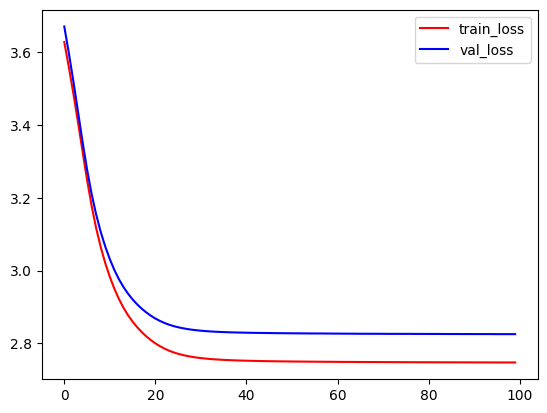

In [50]:


#Define Deep Feed Forward Network for training
model = Sequential()
model.add(Dense(6,input_dim=8,activation = 'relu')) #hidden layer 1
model.add(Dense(6,activation='swish'))#hidden layer 2
model.add(Dense(6,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 1**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.2104 - accuracy: 0.0010 - val_loss: 3.2692 - val_accuracy: 0.0077
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1543 - accuracy: 0.0160 - val_loss: 3.2169 - val_accuracy: 0.0385
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1076 - accuracy: 0.0760 - val_loss: 3.1718 - val_accuracy: 0.0731
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0662 - accuracy: 0.1550 - val_loss: 3.1316 - val_accuracy: 0.2115
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0285 - accuracy: 0.2510 - val_loss: 3.0944 - val_accuracy: 0.2577
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9936 - accuracy: 0.2720 - val_loss: 3.0602 - val_accuracy: 0.2423
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9618 - accuracy: 0.2670 - val_loss: 3.0298 - val_accuracy: 0.2423
Epoch 8/100
3

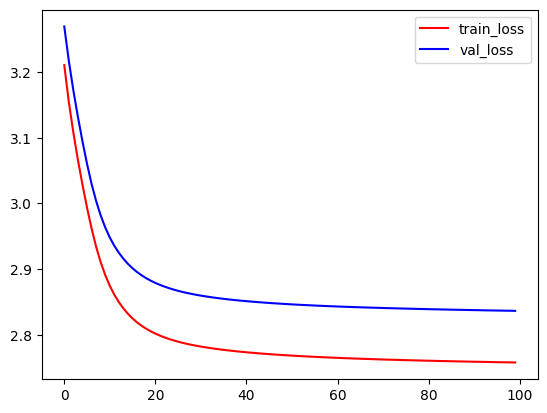

In [52]:
model = Sequential()
model.add(Dense(6,input_dim=8,activation = 'tanh')) #hidden layer 1
model.add(Dense(6,activation='relu'))#hidden layer 2
model.add(Dense(6,activation='tanh'))#hidden layer 3
model.add(Dense(6,activation='softmax'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 2**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.0695 - accuracy: 0.3020 - val_loss: 3.1367 - val_accuracy: 0.2692
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0335 - accuracy: 0.2950 - val_loss: 3.1023 - val_accuracy: 0.2538
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0016 - accuracy: 0.2810 - val_loss: 3.0714 - val_accuracy: 0.2615
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9731 - accuracy: 0.2800 - val_loss: 3.0440 - val_accuracy: 0.2577
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9480 - accuracy: 0.2810 - val_loss: 3.0198 - val_accuracy: 0.2577
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9259 - accuracy: 0.2810 - val_loss: 2.9985 - val_accuracy: 0.2577
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9064 - accuracy: 0.2780 - val_loss: 2.9797 - val_accuracy: 0.2577
Epoch 8/100
3

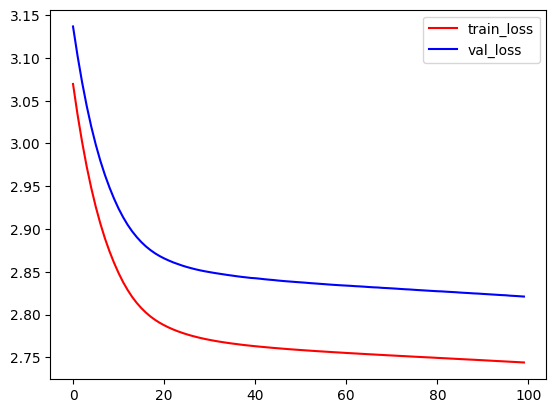

In [53]:
model = Sequential()
model.add(Dense(6,input_dim=8,activation = 'elu')) #hidden layer 1
model.add(Dense(6,activation='elu'))#hidden layer 2
model.add(Dense(6,activation='elu'))#hidden layer 3
model.add(Dense(6,activation='softmax'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 3**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7736 - accuracy: 0.3260 - val_loss: 3.8200 - val_accuracy: 0.3538
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7039 - accuracy: 0.3920 - val_loss: 3.7529 - val_accuracy: 0.4038
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6402 - accuracy: 0.4320 - val_loss: 3.6911 - val_accuracy: 0.4192
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5816 - accuracy: 0.4790 - val_loss: 3.6345 - val_accuracy: 0.4962
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5280 - accuracy: 0.5190 - val_loss: 3.5827 - val_accuracy: 0.5269
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4788 - accuracy: 0.5270 - val_loss: 3.5352 - val_accuracy: 0.5269
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4339 - accuracy: 0.4950 - val_loss: 3.4919 - val_accuracy: 0.5077
Epoch 8/100
3

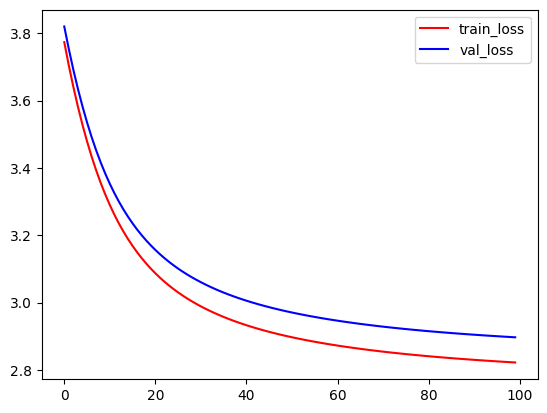

In [54]:
model = Sequential()
model.add(Dense(6,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(6,activation='swish'))#hidden layer 2
model.add(Dense(6,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 4**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9119 - accuracy: 0.0370 - val_loss: 3.9466 - val_accuracy: 0.0615
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9066 - accuracy: 0.1110 - val_loss: 3.9412 - val_accuracy: 0.1577
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9014 - accuracy: 0.2200 - val_loss: 3.9359 - val_accuracy: 0.2308
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8962 - accuracy: 0.2930 - val_loss: 3.9306 - val_accuracy: 0.2769
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8910 - accuracy: 0.3270 - val_loss: 3.9252 - val_accuracy: 0.3000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8857 - accuracy: 0.3490 - val_loss: 3.9199 - val_accuracy: 0.3192
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8805 - accuracy: 0.3650 - val_loss: 3.9146 - val_accuracy: 0.3423
Epoch 8/100
3

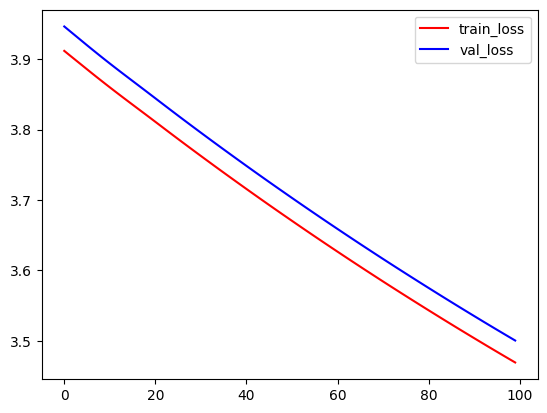

In [56]:
model = Sequential()
model.add(Dense(6,input_dim=8,activation = 'relu')) #hidden layer 1
model.add(Dense(6,activation='relu'))#hidden layer 2
model.add(Dense(6,activation='relu'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.001),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 5**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.2848 - accuracy: 0.4190 - val_loss: 2.9008 - val_accuracy: 0.4577
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8456 - accuracy: 0.4270 - val_loss: 2.8502 - val_accuracy: 0.4577
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8259 - accuracy: 0.4270 - val_loss: 2.8436 - val_accuracy: 0.3462
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8215 - accuracy: 0.3980 - val_loss: 2.8402 - val_accuracy: 0.4577
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8200 - accuracy: 0.4200 - val_loss: 2.8381 - val_accuracy: 0.4577
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8183 - accuracy: 0.4130 - val_loss: 2.8379 - val_accuracy: 0.4577
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8167 - accuracy: 0.4050 - val_loss: 2.8374 - val_accuracy: 0.4577
Epoch 8/100
3

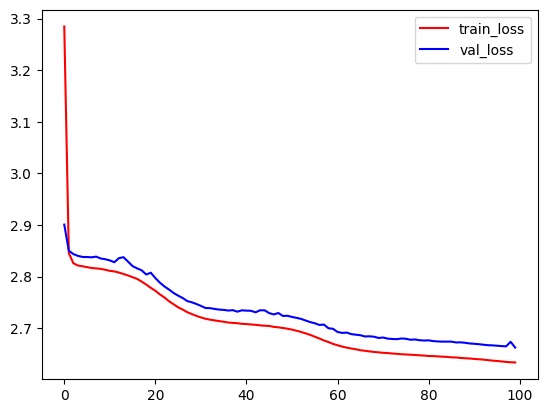

In [58]:
model = Sequential()
model.add(Dense(6,input_dim=8,activation = 'relu')) #hidden layer 1
model.add(Dense(6,activation='relu'))#hidden layer 2
model.add(Dense(6,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 6**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6955 - accuracy: 0.1840 - val_loss: 3.5175 - val_accuracy: 0.2962
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3586 - accuracy: 0.2920 - val_loss: 3.2698 - val_accuracy: 0.2962
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1702 - accuracy: 0.2890 - val_loss: 3.1259 - val_accuracy: 0.2962
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0533 - accuracy: 0.2890 - val_loss: 3.0269 - val_accuracy: 0.2962
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9693 - accuracy: 0.2890 - val_loss: 2.9532 - val_accuracy: 0.2962
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9094 - accuracy: 0.2890 - val_loss: 2.9042 - val_accuracy: 0.2962
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8722 - accuracy: 0.3160 - val_loss: 2.8755 - val_accuracy: 0.3577
Epoch 8/100
3

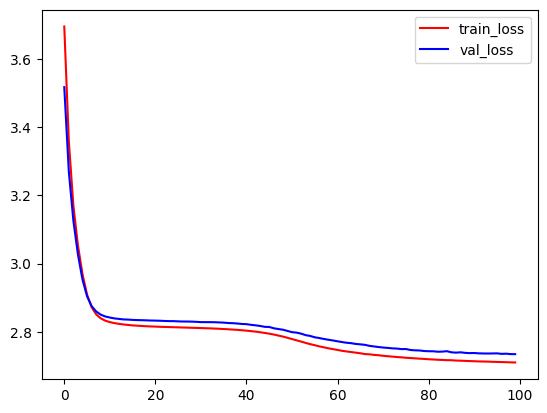

In [59]:
model = Sequential()
model.add(Dense(6,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(6,activation='swish'))#hidden layer 2
model.add(Dense(6,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 7**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.0806 - accuracy: 0.2840 - val_loss: 3.0496 - val_accuracy: 0.2462
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9743 - accuracy: 0.2850 - val_loss: 2.9875 - val_accuracy: 0.2538
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9216 - accuracy: 0.3170 - val_loss: 2.9341 - val_accuracy: 0.3577
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8824 - accuracy: 0.4620 - val_loss: 2.9025 - val_accuracy: 0.4731
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8628 - accuracy: 0.4320 - val_loss: 2.8867 - val_accuracy: 0.4577
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8532 - accuracy: 0.4270 - val_loss: 2.8794 - val_accuracy: 0.4577
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8468 - accuracy: 0.4270 - val_loss: 2.8740 - val_accuracy: 0.4577
Epoch 8/100
3

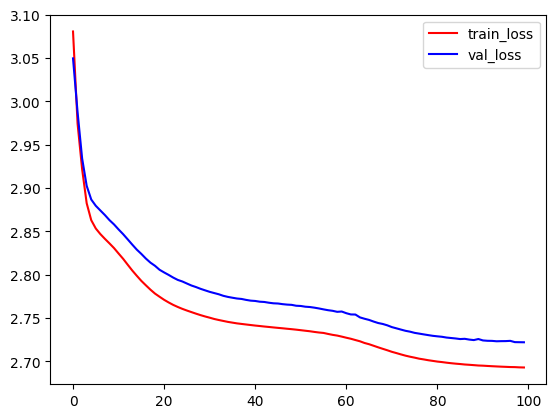

In [60]:
model = Sequential()
model.add(Dense(6,input_dim=8,activation = 'tanh')) #hidden layer 1
model.add(Dense(6,activation='relu'))#hidden layer 2
model.add(Dense(6,activation='tanh'))#hidden layer 3
model.add(Dense(6,activation='softmax'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 8**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6929 - accuracy: 0.3960 - val_loss: 3.5221 - val_accuracy: 0.4577
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3643 - accuracy: 0.4270 - val_loss: 3.2801 - val_accuracy: 0.4577
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1817 - accuracy: 0.4270 - val_loss: 3.1460 - val_accuracy: 0.4577
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0764 - accuracy: 0.4270 - val_loss: 3.0630 - val_accuracy: 0.4577
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0081 - accuracy: 0.4270 - val_loss: 3.0060 - val_accuracy: 0.4577
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9592 - accuracy: 0.4270 - val_loss: 2.9633 - val_accuracy: 0.4577
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9218 - accuracy: 0.4270 - val_loss: 2.9302 - val_accuracy: 0.4577
Epoch 8/100
3

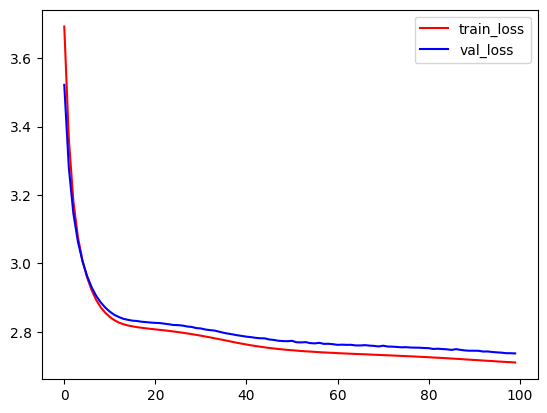

In [62]:
#added two nodes to first hiden layer
model = Sequential()
model.add(Dense(8,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(6,activation='swish'))#hidden layer 2
model.add(Dense(6,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 9**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6382 - accuracy: 0.2610 - val_loss: 3.3982 - val_accuracy: 0.2962
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1944 - accuracy: 0.2890 - val_loss: 3.0599 - val_accuracy: 0.2962
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9680 - accuracy: 0.2890 - val_loss: 2.9253 - val_accuracy: 0.2962
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8853 - accuracy: 0.2890 - val_loss: 2.8766 - val_accuracy: 0.2962
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8527 - accuracy: 0.2920 - val_loss: 2.8558 - val_accuracy: 0.2538
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8371 - accuracy: 0.3450 - val_loss: 2.8461 - val_accuracy: 0.4577
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8298 - accuracy: 0.4270 - val_loss: 2.8419 - val_accuracy: 0.4577
Epoch 8/100
3

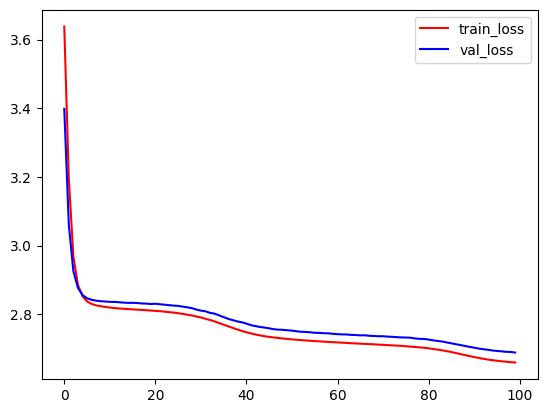

In [63]:
#added two nodes to second hiden layer
model = Sequential()
model.add(Dense(8,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(8,activation='swish'))#hidden layer 2
model.add(Dense(6,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 10**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5597 - accuracy: 0.4230 - val_loss: 3.2261 - val_accuracy: 0.5115
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9659 - accuracy: 0.4770 - val_loss: 2.8962 - val_accuracy: 0.4654
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8417 - accuracy: 0.4300 - val_loss: 2.8519 - val_accuracy: 0.4577
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8224 - accuracy: 0.4270 - val_loss: 2.8397 - val_accuracy: 0.4577
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8170 - accuracy: 0.4270 - val_loss: 2.8372 - val_accuracy: 0.2885
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8127 - accuracy: 0.4260 - val_loss: 2.8438 - val_accuracy: 0.5346
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8103 - accuracy: 0.4350 - val_loss: 2.8310 - val_accuracy: 0.4577
Epoch 8/100
3

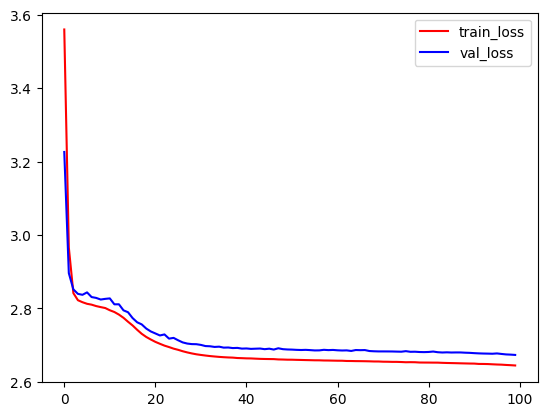

In [64]:
#added two nodes to third hiden layer
model = Sequential()
model.add(Dense(8,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(8,activation='swish'))#hidden layer 2
model.add(Dense(8,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 11**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6184 - accuracy: 0.3250 - val_loss: 3.2437 - val_accuracy: 0.4577
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9497 - accuracy: 0.4270 - val_loss: 2.8649 - val_accuracy: 0.4577
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8379 - accuracy: 0.4270 - val_loss: 2.8440 - val_accuracy: 0.4577
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8239 - accuracy: 0.4240 - val_loss: 2.8384 - val_accuracy: 0.4577
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8186 - accuracy: 0.4220 - val_loss: 2.8345 - val_accuracy: 0.4577
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8151 - accuracy: 0.4290 - val_loss: 2.8324 - val_accuracy: 0.4577
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8116 - accuracy: 0.4330 - val_loss: 2.8291 - val_accuracy: 0.4577
Epoch 8/100
3

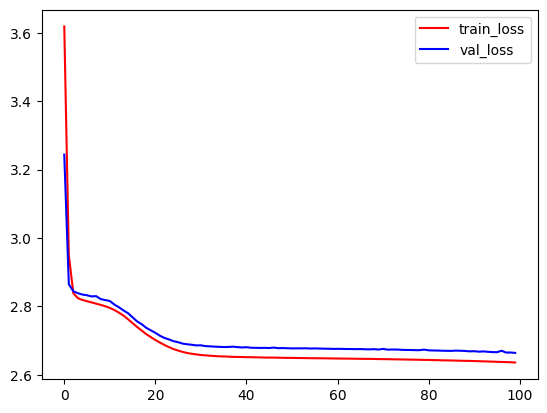

In [65]:
#added two nodes to first hiden layer
model = Sequential()
model.add(Dense(10,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(8,activation='swish'))#hidden layer 2
model.add(Dense(8,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 12**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6662 - accuracy: 0.2930 - val_loss: 3.4643 - val_accuracy: 0.3308
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2812 - accuracy: 0.3200 - val_loss: 3.1653 - val_accuracy: 0.3308
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0252 - accuracy: 0.3370 - val_loss: 2.9552 - val_accuracy: 0.3654
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8838 - accuracy: 0.3500 - val_loss: 2.8785 - val_accuracy: 0.3885
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8420 - accuracy: 0.3860 - val_loss: 2.8548 - val_accuracy: 0.4308
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8289 - accuracy: 0.3890 - val_loss: 2.8463 - val_accuracy: 0.3769
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8233 - accuracy: 0.3750 - val_loss: 2.8422 - val_accuracy: 0.4231
Epoch 8/100
3

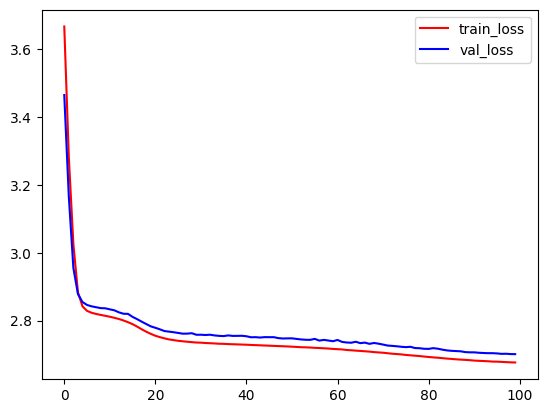

In [66]:
#added two nodes to second hiden layer
model = Sequential()
model.add(Dense(10,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(10,activation='swish'))#hidden layer 2
model.add(Dense(8,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 13**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5908 - accuracy: 0.2690 - val_loss: 3.3239 - val_accuracy: 0.3731
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0824 - accuracy: 0.4070 - val_loss: 2.9488 - val_accuracy: 0.4577
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8883 - accuracy: 0.4270 - val_loss: 2.8776 - val_accuracy: 0.4577
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8495 - accuracy: 0.4270 - val_loss: 2.8585 - val_accuracy: 0.4577
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8332 - accuracy: 0.4270 - val_loss: 2.8469 - val_accuracy: 0.4577
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8248 - accuracy: 0.4270 - val_loss: 2.8430 - val_accuracy: 0.4577
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8213 - accuracy: 0.4260 - val_loss: 2.8409 - val_accuracy: 0.4577
Epoch 8/100
3

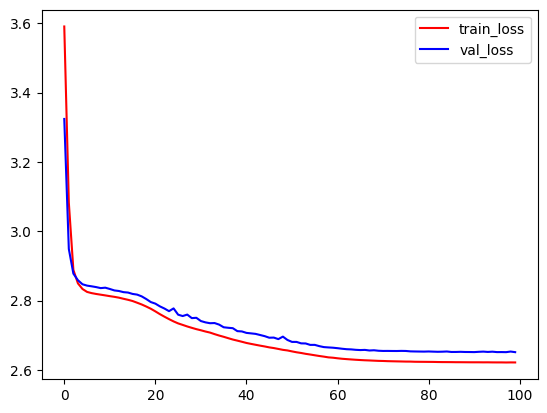

In [67]:
#added two nodes to third hiden layer
model = Sequential()
model.add(Dense(10,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(10,activation='swish'))#hidden layer 2
model.add(Dense(10,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 14**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.4651 - accuracy: 0.3280 - val_loss: 3.0504 - val_accuracy: 0.2538
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8923 - accuracy: 0.3780 - val_loss: 2.8603 - val_accuracy: 0.4577
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8323 - accuracy: 0.4270 - val_loss: 2.8446 - val_accuracy: 0.4577
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8253 - accuracy: 0.4270 - val_loss: 2.8408 - val_accuracy: 0.4577
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8221 - accuracy: 0.4270 - val_loss: 2.8431 - val_accuracy: 0.4654
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8211 - accuracy: 0.4300 - val_loss: 2.8396 - val_accuracy: 0.4577
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8195 - accuracy: 0.4320 - val_loss: 2.8365 - val_accuracy: 0.4577
Epoch 8/100
3

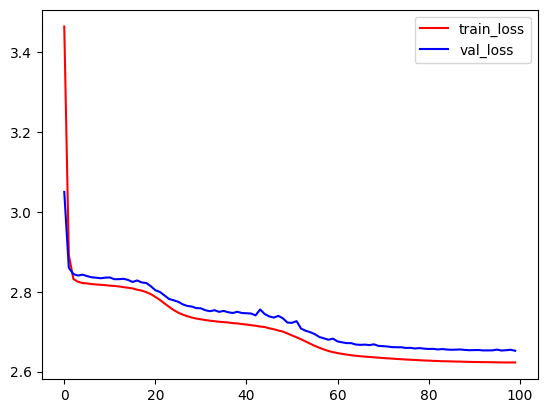

In [68]:
#added two nodes to first hiden layer
model = Sequential()
model.add(Dense(12,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(10,activation='swish'))#hidden layer 2
model.add(Dense(10,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 15**

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6033 - accuracy: 0.2360 - val_loss: 3.3077 - val_accuracy: 0.2962
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0948 - accuracy: 0.2890 - val_loss: 2.9789 - val_accuracy: 0.2962
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9084 - accuracy: 0.2890 - val_loss: 2.8916 - val_accuracy: 0.2962
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8591 - accuracy: 0.2890 - val_loss: 2.8626 - val_accuracy: 0.2962
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8381 - accuracy: 0.2890 - val_loss: 2.8474 - val_accuracy: 0.2962
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8266 - accuracy: 0.3540 - val_loss: 2.8405 - val_accuracy: 0.4731
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8213 - accuracy: 0.4340 - val_loss: 2.8374 - val_accuracy: 0.4577
Epoch 8/100
3

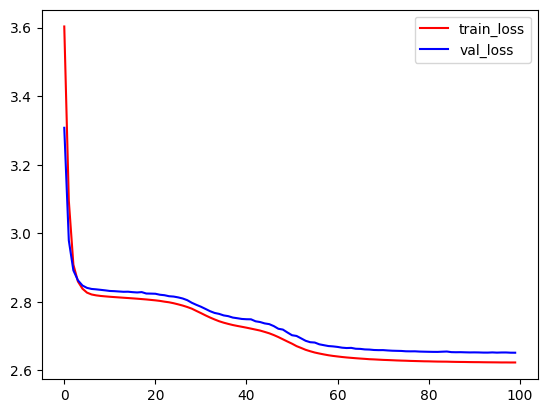

In [69]:
#added two nodes to second hiden layer
model = Sequential()
model.add(Dense(12,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(12,activation='swish'))#hidden layer 2
model.add(Dense(10,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 16**

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 3.5136 - accuracy: 0.3318 - val_loss: 3.2072 - val_accuracy: 0.2902
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 2.9605 - accuracy: 0.2836 - val_loss: 2.8822 - val_accuracy: 0.2902
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8191 - accuracy: 0.2700 - val_loss: 2.8490 - val_accuracy: 0.2832
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8042 - accuracy: 0.3245 - val_loss: 2.8426 - val_accuracy: 0.4266
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8003 - accuracy: 0.3900 - val_loss: 2.8402 - val_accuracy: 0.2902
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 2.7980 - accuracy: 0.3555 - val_loss: 2.8380 - val_accuracy: 0.4510
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 2.7962 - accuracy: 0.3918 - val_loss: 2.8366 - val_accuracy: 0.4545
Epoch 8/100
3

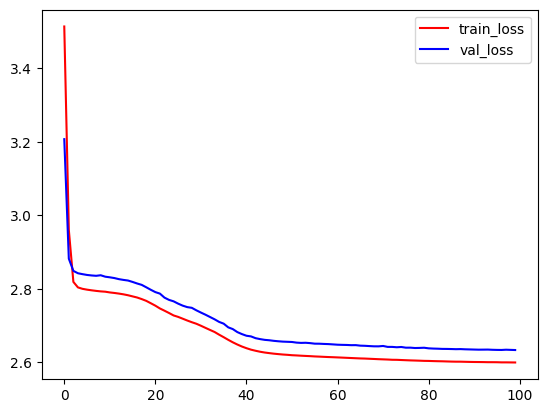

In [71]:
#added two nodes to third hiden layer
model = Sequential()
model.add(Dense(12,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(12,activation='swish'))#hidden layer 2
model.add(Dense(12,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 17**

In [70]:
# increasing data size 
x_train , y_train = create_data(1100,noise=True,mu=0,std=0.001)
x_val , y_val = create_data(286)

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 3.6439 - accuracy: 0.4045 - val_loss: 3.4576 - val_accuracy: 0.4580
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 3.2874 - accuracy: 0.4264 - val_loss: 3.2228 - val_accuracy: 0.4580
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 3.1190 - accuracy: 0.4264 - val_loss: 3.1063 - val_accuracy: 0.4580
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 3.0303 - accuracy: 0.4264 - val_loss: 3.0398 - val_accuracy: 0.4580
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 2.9770 - accuracy: 0.4264 - val_loss: 2.9976 - val_accuracy: 0.4580
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 2.9420 - accuracy: 0.4264 - val_loss: 2.9687 - val_accuracy: 0.4580
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 2.9173 - accuracy: 0.4264 - val_loss: 2.9478 - val_accuracy: 0.4580
Epoch 8/100
3

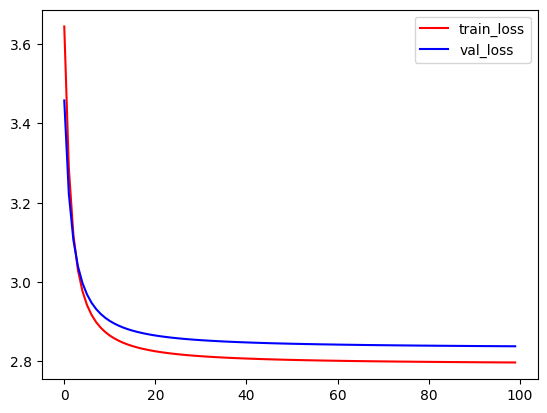

In [72]:
#added two nodes to first hiden layer
model = Sequential()
model.add(Dense(8,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(6,activation='swish'))#hidden layer 2
model.add(Dense(6,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 18**

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 3.6181 - accuracy: 0.2191 - val_loss: 3.4234 - val_accuracy: 0.3636
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 3.2202 - accuracy: 0.3209 - val_loss: 3.1143 - val_accuracy: 0.2937
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 2.9712 - accuracy: 0.2845 - val_loss: 2.9316 - val_accuracy: 0.2902
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8519 - accuracy: 0.2845 - val_loss: 2.8682 - val_accuracy: 0.2937
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8165 - accuracy: 0.3127 - val_loss: 2.8518 - val_accuracy: 0.3042
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8069 - accuracy: 0.3873 - val_loss: 2.8462 - val_accuracy: 0.3601
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8026 - accuracy: 0.3809 - val_loss: 2.8416 - val_accuracy: 0.5105
Epoch 8/100
3

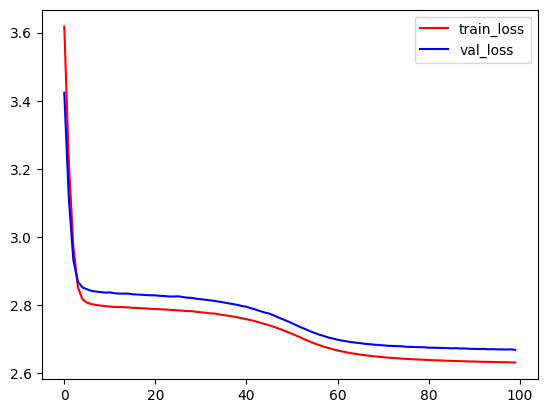

In [73]:
#added two nodes to second hiden layer
model = Sequential()
model.add(Dense(8,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(8,activation='swish'))#hidden layer 2
model.add(Dense(6,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 19**

Epoch 1/100
35/35 [==============================] - 0s 3ms/step - loss: 3.6132 - accuracy: 0.2591 - val_loss: 3.3716 - val_accuracy: 0.1573
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 3.0951 - accuracy: 0.2318 - val_loss: 2.9403 - val_accuracy: 0.2902
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8435 - accuracy: 0.3073 - val_loss: 2.8581 - val_accuracy: 0.4720
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8121 - accuracy: 0.4155 - val_loss: 2.8490 - val_accuracy: 0.4580
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8069 - accuracy: 0.4282 - val_loss: 2.8454 - val_accuracy: 0.4580
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8047 - accuracy: 0.4273 - val_loss: 2.8440 - val_accuracy: 0.4825
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8032 - accuracy: 0.4327 - val_loss: 2.8442 - val_accuracy: 0.3007
Epoch 8/100
3

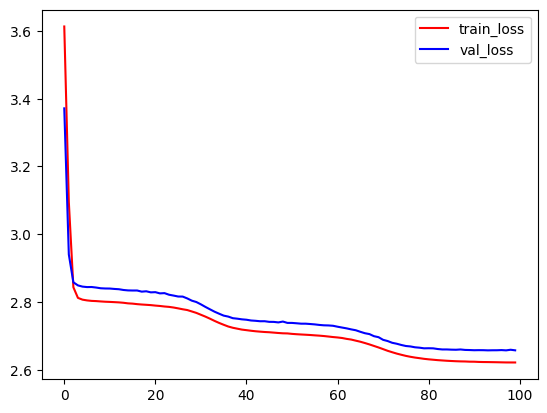

In [74]:
#added two nodes to third hiden layer
model = Sequential()
model.add(Dense(8,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(8,activation='swish'))#hidden layer 2
model.add(Dense(8,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 20**

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 3.5874 - accuracy: 0.2873 - val_loss: 3.3257 - val_accuracy: 0.2902
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 3.0802 - accuracy: 0.2836 - val_loss: 2.9724 - val_accuracy: 0.2902
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8794 - accuracy: 0.2836 - val_loss: 2.8935 - val_accuracy: 0.2902
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8310 - accuracy: 0.2836 - val_loss: 2.8601 - val_accuracy: 0.2902
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8078 - accuracy: 0.2836 - val_loss: 2.8437 - val_accuracy: 0.2972
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 2.7984 - accuracy: 0.3709 - val_loss: 2.8374 - val_accuracy: 0.4685
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 2.7950 - accuracy: 0.4409 - val_loss: 2.8349 - val_accuracy: 0.4965
Epoch 8/100
3

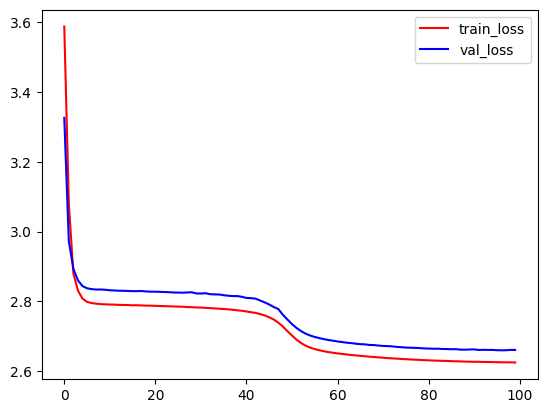

In [75]:
#added two nodes to first hiden layer
model = Sequential()
model.add(Dense(10,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(8,activation='swish'))#hidden layer 2
model.add(Dense(8,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 21**

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 3.6284 - accuracy: 0.3391 - val_loss: 3.4038 - val_accuracy: 0.4580
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 3.1566 - accuracy: 0.4264 - val_loss: 3.0014 - val_accuracy: 0.4580
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8857 - accuracy: 0.4264 - val_loss: 2.8782 - val_accuracy: 0.4580
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8241 - accuracy: 0.4264 - val_loss: 2.8465 - val_accuracy: 0.4580
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8012 - accuracy: 0.4355 - val_loss: 2.8379 - val_accuracy: 0.5664
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 2.7950 - accuracy: 0.4436 - val_loss: 2.8341 - val_accuracy: 0.4580
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 2.7919 - accuracy: 0.4464 - val_loss: 2.8326 - val_accuracy: 0.5420
Epoch 8/100
3

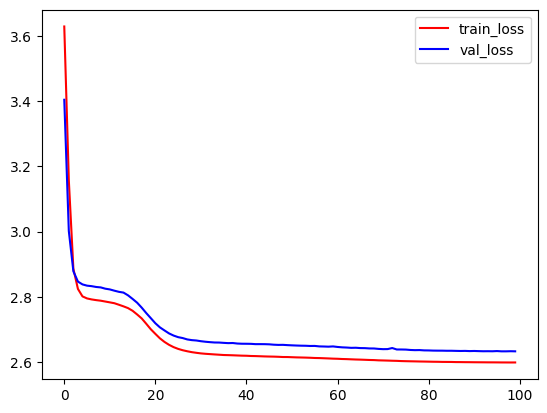

In [76]:
#added two nodes to second hiden layer
model = Sequential()
model.add(Dense(10,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(10,activation='swish'))#hidden layer 2
model.add(Dense(8,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 22**

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 3.6220 - accuracy: 0.4491 - val_loss: 3.4205 - val_accuracy: 0.4580
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 3.2123 - accuracy: 0.4264 - val_loss: 3.0937 - val_accuracy: 0.4580
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 2.9452 - accuracy: 0.4264 - val_loss: 2.9014 - val_accuracy: 0.4580
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8317 - accuracy: 0.4264 - val_loss: 2.8497 - val_accuracy: 0.4580
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8021 - accuracy: 0.4582 - val_loss: 2.8364 - val_accuracy: 0.6014
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 2.7939 - accuracy: 0.5382 - val_loss: 2.8317 - val_accuracy: 0.6154
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 2.7903 - accuracy: 0.5482 - val_loss: 2.8288 - val_accuracy: 0.5664
Epoch 8/100
3

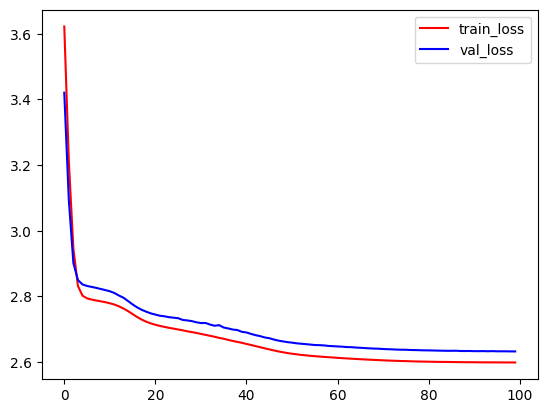

In [77]:
#added two nodes to third hiden layer
model = Sequential()
model.add(Dense(10,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(10,activation='swish'))#hidden layer 2
model.add(Dense(10,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 23**

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 3.5649 - accuracy: 0.3673 - val_loss: 3.2619 - val_accuracy: 0.4580
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 2.9928 - accuracy: 0.4264 - val_loss: 2.8973 - val_accuracy: 0.4580
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8262 - accuracy: 0.4264 - val_loss: 2.8512 - val_accuracy: 0.4580
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8029 - accuracy: 0.4236 - val_loss: 2.8417 - val_accuracy: 0.3322
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 2.7966 - accuracy: 0.3982 - val_loss: 2.8362 - val_accuracy: 0.4895
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 2.7932 - accuracy: 0.4336 - val_loss: 2.8332 - val_accuracy: 0.4685
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 2.7902 - accuracy: 0.4464 - val_loss: 2.8298 - val_accuracy: 0.5420
Epoch 8/100
3

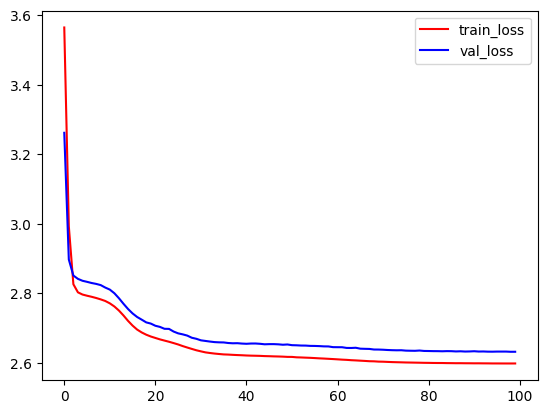

In [78]:
#added two nodes to first hiden layer
model = Sequential()
model.add(Dense(12,input_dim=8,activation = 'swish')) #hidden layer 1
model.add(Dense(10,activation='swish'))#hidden layer 2
model.add(Dense(10,activation='swish'))#hidden layer 3
model.add(Dense(6,activation='sigmoid'))#output

model.compile(loss=mse,optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
train(model=model,x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,epochs=100,batch_size=100)

**Figure 24**

# Comments and Discussions
Until this stage, I have implemented the creation of a dataset and the training of a sequential model. I created a function called 'create_data' that takes an input 'Nt' for the number of instances in the data parameter and a boolean value to determine if the data is used for training. If so, noise is added, along with the parameters 'mu' and 'standard validation' value. I generated random numbers for the input using the random function from the numpy library.

Another function, 'train,' was implemented to train a model with specific parameters. At the end of the training process, I plotted the loss graphs with respect to epoch. The resulting figure represented the loss graph (Figure 1). According to this graph, the model fitted the data well up to a certain point, after which the training loss decreased significantly more than the validation loss. This phenomenon indicates that the model was overfitting, and the goal was to bring the validation loss closer to the training loss.

To address the overfitting issue, I experimented with changing the activation functions. In Figure 2, I replaced the activation function with tanh, but the model failed to learn, displaying a clear case of underfitting, which was worse than the initial model (Figure 1). Additionally, changing the activation function to ELU (Figure 3) resulted in a similar underfitting issue, indicating that continuous functions better represented the problem compared to piecewise linear functions like ELU.

Intriguingly, when I switched to the Swish activation function (Figure 4), the model's performance improved significantly. The loss graphs showed a better fit, indicating that continuous functions better addressed the problem compared to linear functions. However, using ReLU (Figure 5) demonstrated that a purely linear activation function may not adequately represent the output, leading to higher losses and parallel decrease in both training and validation losses.

By combining ReLU and Swish, I achieved a more relative model, with the validation loss decreasing in tandem with the training loss, and the gap between the two minimized. This suggested a well-fitted model. Continuing with the Swish activation function, a learning rate of 0.1, and the last layer's output set as sigmoid, I experimented with increasing the number of nodes in each layer. Adding two nodes to each layer improved the model's performance significantly, as shown in Figure 8, where the loss values decreased equally. However, adding two nodes to the second and third hidden layers demonstrated a diminishing return, indicating that increasing model complexity is not always beneficial, especially for less complex problems.

This trend was observed consistently when I increased the data by 10%. The findings from systematic experimentation emphasized that the Swish activation function yielded the most effective results, leading to a well-fitted and optimally performing model. Additionally, it underscored the importance of balancing model complexity with data size and ensuring that the chosen model adequately generalizes the problem at hand.

## Part 2: Object recognition using CNNs.

In [1]:
#import libaries for Part 2
from keras.utils import to_categorical
from glob import glob
import cv2
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
#Added noise
def add_noise(img): 
  
    # Getting the dimensions of the image 
    row , col = img.shape 
      
    # Randomly pick some pixels in the 
    # image for coloring them white 
    # Pick a random number between 300 and 10000 
    number_of_pixels = random.randint(300, 10000) 
    for i in range(number_of_pixels): 
        
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
          
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
          
        # Color that pixel to white 
        img[y_coord][x_coord] = 255
          
    # Randomly pick some pixels in 
    # the image for coloring them black 
    # Pick a random number between 300 and 10000 
    number_of_pixels = random.randint(300 , 10000) 
    for i in range(number_of_pixels): 
        
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
          
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
          
        # Color that pixel to black 
        img[y_coord][x_coord] = 0
          
    return img

In [15]:
#create a function for label image and load to train dataset.Preprocessing steps ( add noise ,normalization, one-hot encoding for labels)

def createDataset(root:str):
    images_path = glob(root+r'/*/*.png')
    label_id = -1
    last_label = ''
    counter = 0
    train_images = []
    train_labels = []
    val_images = []
    val_labels = []
    for path in images_path:
        label = path.split('\\')[-2]
        if last_label != label:
            counter = 0
            label_id +=1
            last_label = label
        img_orj = cv2.imread(path,0)
        #img = cv2.resize(img,(128,128))
        img = img_orj[61:-61,61:-61]
        img = add_noise(img) #add salt and pepper noise
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        img = img.astype(np.float32)
        img = img / 255.0 #normalization
        if counter<45:
            train_images.append(img)
            train_labels.append(label_id)
            counter += 1
        else :
            val_images.append(img)
            val_labels.append(label_id)
            counter += 1
        
    
    num_classes = label_id +1
    
    x_train = np.array(train_images)
    x_val = np.array(val_images)
    y_train = to_categorical(np.array(train_labels),num_classes=num_classes)
    y_val = to_categorical (np.array(val_labels),num_classes=num_classes)

    return x_train,y_train,x_val,y_val



In [6]:
#Define Alexnet

# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='relu', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(4096, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(4096, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))

# compile the model with a loss funciton, a metric and and optimizqation method
opt = SGD(learning_rate=  0.01)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])



In [10]:
#train model function 
def train(model, x_train,x_val,y_train,y_val,batch_size,epochs):
    history = model.fit(x_train,y_train,epochs=epochs,validation_data=(x_val,y_val),batch_size=batch_size)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot((range(len(train_loss))),train_loss,'r')
    plt.plot((range(len(val_loss))),val_loss,'b')
    plt.legend(['train_loss','val_loss'])
    plt.show()

360
45
Epoch 1/35
45/45 [==============================] - 5s 108ms/step - loss: 1.9986 - accuracy: 0.1500 - val_loss: 1.9986 - val_accuracy: 0.1728
Epoch 2/35
45/45 [==============================] - 5s 109ms/step - loss: 1.9981 - accuracy: 0.1611 - val_loss: 2.0213 - val_accuracy: 0.1605
Epoch 3/35
45/45 [==============================] - 5s 107ms/step - loss: 1.9589 - accuracy: 0.2083 - val_loss: 2.0013 - val_accuracy: 0.1852
Epoch 4/35
45/45 [==============================] - 5s 108ms/step - loss: 1.9542 - accuracy: 0.2028 - val_loss: 1.9759 - val_accuracy: 0.1605
Epoch 5/35
45/45 [==============================] - 5s 107ms/step - loss: 1.9349 - accuracy: 0.1917 - val_loss: 1.9680 - val_accuracy: 0.1358
Epoch 6/35
45/45 [==============================] - 5s 108ms/step - loss: 1.9268 - accuracy: 0.2000 - val_loss: 1.9580 - val_accuracy: 0.1852
Epoch 7/35
45/45 [==============================] - 5s 108ms/step - loss: 1.8943 - accuracy: 0.2250 - val_loss: 1.9406 - val_accuracy: 0.2099

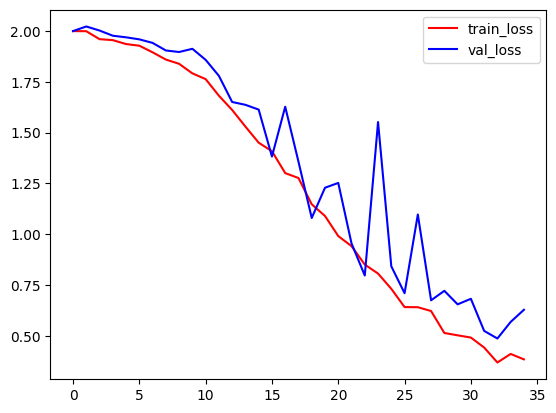

In [17]:
x_train,y_train,x_val,y_val = createDataset(root=r'dataset')
print(len(x_train))
print(len(y_val))
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 25**

Epoch 1/35
45/45 [==============================] - 6s 114ms/step - loss: 2.1013 - accuracy: 0.1028 - val_loss: 2.0793 - val_accuracy: 0.1333
Epoch 2/35
45/45 [==============================] - 5s 110ms/step - loss: 2.0894 - accuracy: 0.1056 - val_loss: 2.0796 - val_accuracy: 0.1333
Epoch 3/35
45/45 [==============================] - 5s 110ms/step - loss: 2.0915 - accuracy: 0.1278 - val_loss: 2.0827 - val_accuracy: 0.1111
Epoch 4/35
45/45 [==============================] - 5s 119ms/step - loss: 2.0849 - accuracy: 0.1194 - val_loss: 2.0783 - val_accuracy: 0.1333
Epoch 5/35
45/45 [==============================] - 5s 121ms/step - loss: 2.0898 - accuracy: 0.1028 - val_loss: 2.0805 - val_accuracy: 0.1333
Epoch 6/35
45/45 [==============================] - 5s 121ms/step - loss: 2.0888 - accuracy: 0.1000 - val_loss: 2.0796 - val_accuracy: 0.1111
Epoch 7/35
45/45 [==============================] - 6s 126ms/step - loss: 2.0869 - accuracy: 0.1139 - val_loss: 2.0779 - val_accuracy: 0.1778
Epoch 

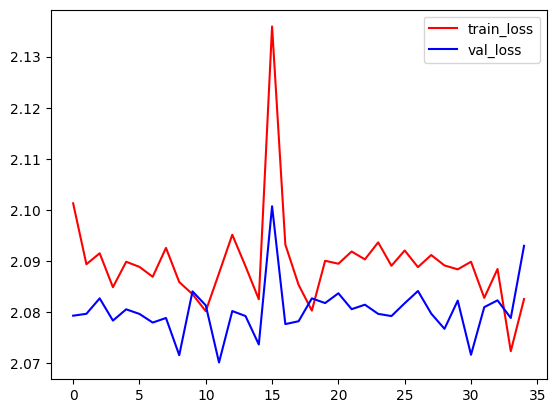

In [22]:
#Define Alexnet
del Alexnet_model
# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='relu', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(4096, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(4096, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))
# compile the model with a loss funciton, a metric and and optimizqation method with different learning rate
opt = SGD(learning_rate=  0.1)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 26**

In [23]:
#Define Alexnet
#change activation function relu -> swish
del Alexnet_model
# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='swish', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(4096, activation = 'swish'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(4096, activation = 'swish'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))

Epoch 1/35
45/45 [==============================] - 6s 116ms/step - loss: 2.0803 - accuracy: 0.0833 - val_loss: 2.0794 - val_accuracy: 0.1333
Epoch 2/35
45/45 [==============================] - 5s 111ms/step - loss: 2.0803 - accuracy: 0.0944 - val_loss: 2.0794 - val_accuracy: 0.1111
Epoch 3/35
45/45 [==============================] - 5s 111ms/step - loss: 2.0803 - accuracy: 0.0944 - val_loss: 2.0794 - val_accuracy: 0.1778
Epoch 4/35
45/45 [==============================] - 5s 111ms/step - loss: 2.0801 - accuracy: 0.0833 - val_loss: 2.0794 - val_accuracy: 0.1778
Epoch 5/35
45/45 [==============================] - 5s 115ms/step - loss: 2.0800 - accuracy: 0.0972 - val_loss: 2.0794 - val_accuracy: 0.2000
Epoch 6/35
45/45 [==============================] - 5s 114ms/step - loss: 2.0802 - accuracy: 0.1250 - val_loss: 2.0794 - val_accuracy: 0.1333
Epoch 7/35
45/45 [==============================] - 5s 118ms/step - loss: 2.0803 - accuracy: 0.0778 - val_loss: 2.0794 - val_accuracy: 0.1111
Epoch 

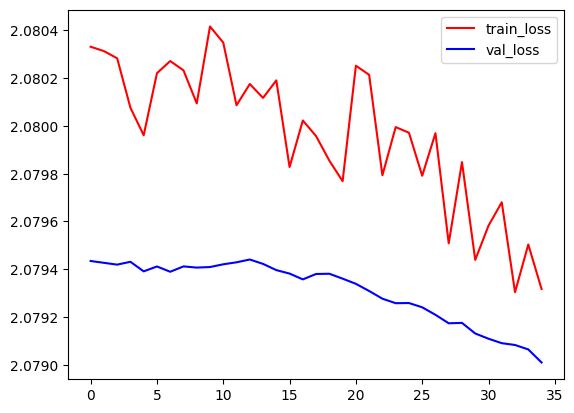

In [24]:
# compile the model with a loss funciton, a metric and and optimizqation method
opt = SGD(learning_rate=  0.01)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 27**

In [25]:
#Define Alexnet
#change activation function swish -> tanh
del Alexnet_model
# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='tanh', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'tanh'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'tanh'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'tanh'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'tanh'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(4096, activation = 'tanh'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(4096, activation = 'tanh'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))

Epoch 1/35
45/45 [==============================] - 6s 114ms/step - loss: 2.1531 - accuracy: 0.1000 - val_loss: 2.0667 - val_accuracy: 0.0889
Epoch 2/35
45/45 [==============================] - 5s 114ms/step - loss: 2.0941 - accuracy: 0.1278 - val_loss: 2.0746 - val_accuracy: 0.1778
Epoch 3/35
45/45 [==============================] - 5s 114ms/step - loss: 2.0681 - accuracy: 0.1361 - val_loss: 2.1192 - val_accuracy: 0.0889
Epoch 4/35
45/45 [==============================] - 5s 112ms/step - loss: 2.0433 - accuracy: 0.1694 - val_loss: 2.1496 - val_accuracy: 0.0444
Epoch 5/35
45/45 [==============================] - 5s 111ms/step - loss: 2.0363 - accuracy: 0.1944 - val_loss: 2.1548 - val_accuracy: 0.1111
Epoch 6/35
45/45 [==============================] - 5s 110ms/step - loss: 2.0001 - accuracy: 0.2139 - val_loss: 2.1186 - val_accuracy: 0.1333
Epoch 7/35
45/45 [==============================] - 5s 114ms/step - loss: 1.9521 - accuracy: 0.2361 - val_loss: 2.2570 - val_accuracy: 0.0667
Epoch 

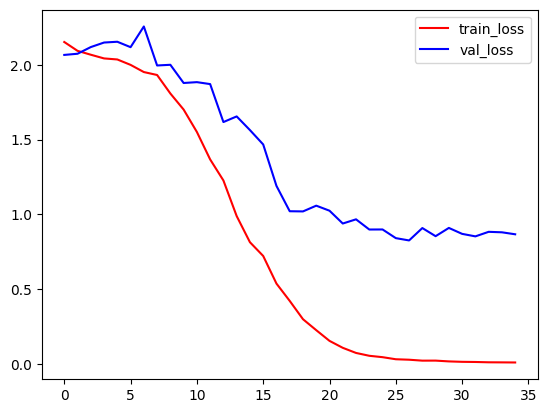

In [26]:
# compile the model with a loss funciton, a metric and and optimizqation method
opt = SGD(learning_rate=  0.01)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 28**

Epoch 1/35
45/45 [==============================] - 5s 105ms/step - loss: 2.0831 - accuracy: 0.0972 - val_loss: 2.0787 - val_accuracy: 0.1333
Epoch 2/35
45/45 [==============================] - 5s 101ms/step - loss: 2.0841 - accuracy: 0.1000 - val_loss: 2.0786 - val_accuracy: 0.0444
Epoch 3/35
45/45 [==============================] - 4s 100ms/step - loss: 2.0838 - accuracy: 0.1194 - val_loss: 2.0781 - val_accuracy: 0.1111
Epoch 4/35
45/45 [==============================] - 4s 98ms/step - loss: 2.0810 - accuracy: 0.1194 - val_loss: 2.0782 - val_accuracy: 0.1333
Epoch 5/35
45/45 [==============================] - 4s 99ms/step - loss: 2.0802 - accuracy: 0.1278 - val_loss: 2.0770 - val_accuracy: 0.1778
Epoch 6/35
45/45 [==============================] - 5s 102ms/step - loss: 2.0829 - accuracy: 0.1194 - val_loss: 2.0779 - val_accuracy: 0.1333
Epoch 7/35
45/45 [==============================] - 5s 100ms/step - loss: 2.0771 - accuracy: 0.1250 - val_loss: 2.0772 - val_accuracy: 0.1778
Epoch 8/

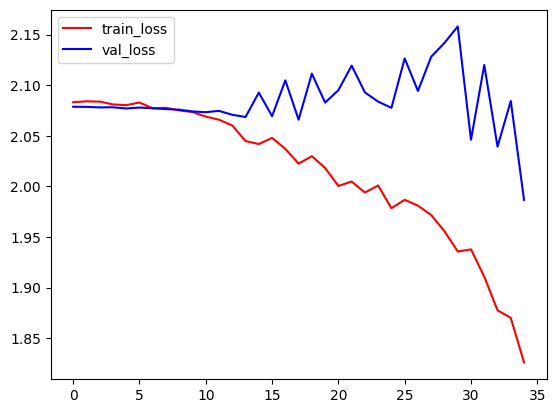

In [31]:
#Define Alexnet
del Alexnet_model
# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='relu', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(3687, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(3687, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))

# compile the model with a loss funciton, a metric and and optimizqation method
opt = SGD(learning_rate=  0.01)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 29**

Epoch 1/35
45/45 [==============================] - 5s 104ms/step - loss: 2.1000 - accuracy: 0.0972 - val_loss: 2.0787 - val_accuracy: 0.1333
Epoch 2/35
45/45 [==============================] - 5s 104ms/step - loss: 2.0919 - accuracy: 0.0917 - val_loss: 2.0795 - val_accuracy: 0.1111
Epoch 3/35
45/45 [==============================] - 5s 103ms/step - loss: 2.0887 - accuracy: 0.1167 - val_loss: 2.0819 - val_accuracy: 0.1111
Epoch 4/35
45/45 [==============================] - 5s 103ms/step - loss: 2.0895 - accuracy: 0.1222 - val_loss: 2.0815 - val_accuracy: 0.1333
Epoch 5/35
45/45 [==============================] - 5s 102ms/step - loss: 2.0905 - accuracy: 0.1333 - val_loss: 2.0809 - val_accuracy: 0.1333
Epoch 6/35
45/45 [==============================] - 5s 100ms/step - loss: 2.0883 - accuracy: 0.1000 - val_loss: 2.0902 - val_accuracy: 0.1111
Epoch 7/35
45/45 [==============================] - 5s 101ms/step - loss: 2.0887 - accuracy: 0.1194 - val_loss: 2.0843 - val_accuracy: 0.1333
Epoch 

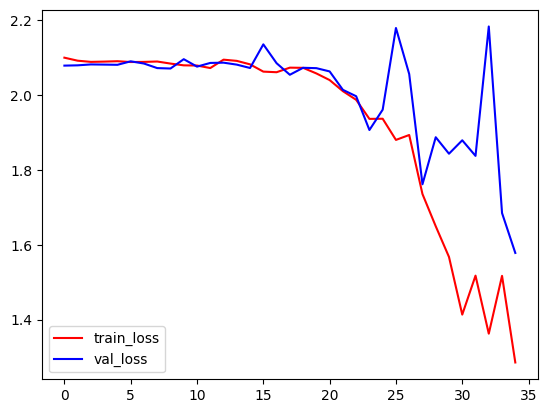

In [32]:
#Define Alexnet
del Alexnet_model
# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='relu', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(3687, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(3687, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))
# compile the model with a loss funciton, a metric and and optimizqation method with different learning rate
opt = SGD(learning_rate=  0.1)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 30**

Epoch 1/35
45/45 [==============================] - 5s 107ms/step - loss: 2.0802 - accuracy: 0.1000 - val_loss: 2.0794 - val_accuracy: 0.1333
Epoch 2/35
45/45 [==============================] - 5s 103ms/step - loss: 2.0802 - accuracy: 0.1250 - val_loss: 2.0794 - val_accuracy: 0.1333
Epoch 3/35
45/45 [==============================] - 5s 102ms/step - loss: 2.0802 - accuracy: 0.0944 - val_loss: 2.0794 - val_accuracy: 0.1333
Epoch 4/35
45/45 [==============================] - 5s 103ms/step - loss: 2.0801 - accuracy: 0.1167 - val_loss: 2.0794 - val_accuracy: 0.1333
Epoch 5/35
45/45 [==============================] - 5s 103ms/step - loss: 2.0802 - accuracy: 0.1028 - val_loss: 2.0794 - val_accuracy: 0.1333
Epoch 6/35
45/45 [==============================] - 4s 100ms/step - loss: 2.0800 - accuracy: 0.1306 - val_loss: 2.0794 - val_accuracy: 0.1333
Epoch 7/35
45/45 [==============================] - 5s 101ms/step - loss: 2.0803 - accuracy: 0.0944 - val_loss: 2.0794 - val_accuracy: 0.1556
Epoch 

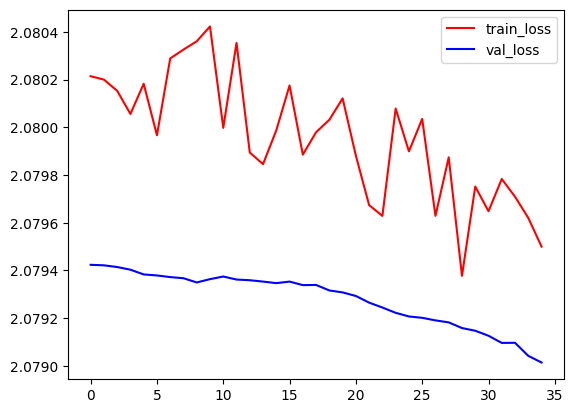

In [33]:
#Define Alexnet
#change activation function relu -> swish
del Alexnet_model
# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='swish', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(3687, activation = 'swish'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(3687, activation = 'swish'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))
# compile the model with a loss funciton, a metric and and optimizqation method
opt = SGD(learning_rate=  0.01)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 31**

Epoch 1/35
45/45 [==============================] - 6s 118ms/step - loss: 2.1539 - accuracy: 0.1139 - val_loss: 2.0989 - val_accuracy: 0.2222
Epoch 2/35
45/45 [==============================] - 5s 115ms/step - loss: 2.0671 - accuracy: 0.1472 - val_loss: 2.1208 - val_accuracy: 0.1778
Epoch 3/35
45/45 [==============================] - 5s 111ms/step - loss: 2.0671 - accuracy: 0.1694 - val_loss: 2.1049 - val_accuracy: 0.1556
Epoch 4/35
45/45 [==============================] - 5s 113ms/step - loss: 2.0409 - accuracy: 0.1556 - val_loss: 2.1556 - val_accuracy: 0.1333
Epoch 5/35
45/45 [==============================] - 5s 113ms/step - loss: 2.0352 - accuracy: 0.1722 - val_loss: 2.0324 - val_accuracy: 0.1778
Epoch 6/35
45/45 [==============================] - 5s 111ms/step - loss: 1.9812 - accuracy: 0.1917 - val_loss: 2.1568 - val_accuracy: 0.0667
Epoch 7/35
45/45 [==============================] - 5s 109ms/step - loss: 1.9564 - accuracy: 0.2306 - val_loss: 2.1005 - val_accuracy: 0.1333
Epoch 

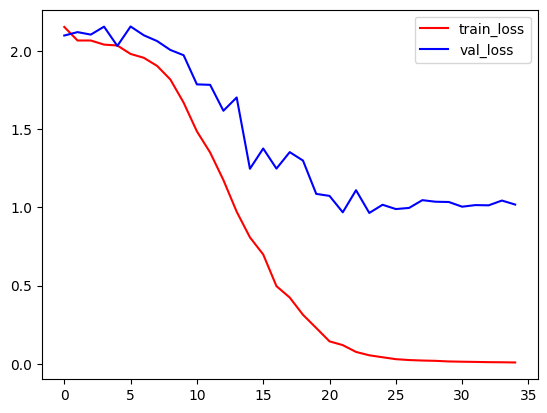

In [34]:
#Define Alexnet
#change activation function swish -> tanh
del Alexnet_model
# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='tanh', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'tanh'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'tanh'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'tanh'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'tanh'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(4096, activation = 'tanh'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(4096, activation = 'tanh'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))
opt = SGD(learning_rate=  0.01)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 32**

Epoch 1/35
45/45 [==============================] - 5s 101ms/step - loss: 2.0840 - accuracy: 0.1139 - val_loss: 2.0800 - val_accuracy: 0.1111
Epoch 2/35
45/45 [==============================] - 4s 96ms/step - loss: 2.0839 - accuracy: 0.1139 - val_loss: 2.0806 - val_accuracy: 0.1333
Epoch 3/35
45/45 [==============================] - 4s 100ms/step - loss: 2.0840 - accuracy: 0.1194 - val_loss: 2.0794 - val_accuracy: 0.1556
Epoch 4/35
45/45 [==============================] - 4s 97ms/step - loss: 2.0813 - accuracy: 0.1139 - val_loss: 2.0800 - val_accuracy: 0.1778
Epoch 5/35
45/45 [==============================] - 4s 97ms/step - loss: 2.0803 - accuracy: 0.1306 - val_loss: 2.0791 - val_accuracy: 0.1333
Epoch 6/35
45/45 [==============================] - 4s 97ms/step - loss: 2.0813 - accuracy: 0.1194 - val_loss: 2.0793 - val_accuracy: 0.1333
Epoch 7/35
45/45 [==============================] - 4s 98ms/step - loss: 2.0775 - accuracy: 0.1250 - val_loss: 2.0783 - val_accuracy: 0.1333
Epoch 8/35


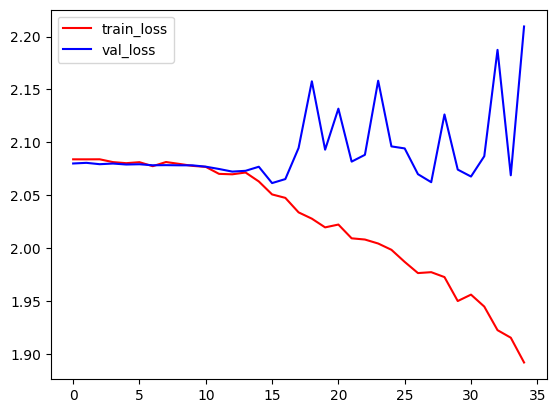

In [41]:
#Define Alexnet

# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='relu', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(3482, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(3482, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))

# compile the model with a loss funciton, a metric and and optimizqation method
opt = SGD(learning_rate=  0.01)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

Epoch 1/35
45/45 [==============================] - 3s 63ms/step - loss: 2.0881 - accuracy: 0.1139 - val_loss: 2.0805 - val_accuracy: 0.1111
Epoch 2/35
45/45 [==============================] - 3s 60ms/step - loss: 2.0852 - accuracy: 0.1222 - val_loss: 2.0771 - val_accuracy: 0.2222
Epoch 3/35
45/45 [==============================] - 3s 61ms/step - loss: 2.0778 - accuracy: 0.1194 - val_loss: 2.0764 - val_accuracy: 0.1778
Epoch 4/35
45/45 [==============================] - 3s 58ms/step - loss: 2.0788 - accuracy: 0.1194 - val_loss: 2.0752 - val_accuracy: 0.2667
Epoch 5/35
45/45 [==============================] - 3s 59ms/step - loss: 2.0715 - accuracy: 0.1778 - val_loss: 2.0719 - val_accuracy: 0.1778
Epoch 6/35
45/45 [==============================] - 3s 59ms/step - loss: 2.0721 - accuracy: 0.1333 - val_loss: 2.0779 - val_accuracy: 0.0889
Epoch 7/35
45/45 [==============================] - 3s 61ms/step - loss: 2.0651 - accuracy: 0.1611 - val_loss: 2.0693 - val_accuracy: 0.1333
Epoch 8/35
45

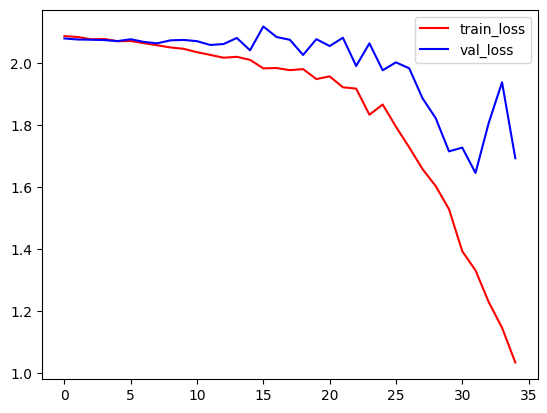

In [36]:
#Define Alexnet
del Alexnet_model
# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='relu', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(614, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))

# compile the model with a loss funciton, a metric and and optimizqation method
opt = SGD(learning_rate=  0.01)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 34**

Epoch 1/35
45/45 [==============================] - 4s 73ms/step - loss: 2.1060 - accuracy: 0.1083 - val_loss: 2.0797 - val_accuracy: 0.1333
Epoch 2/35
45/45 [==============================] - 3s 60ms/step - loss: 2.0885 - accuracy: 0.1028 - val_loss: 2.0818 - val_accuracy: 0.1111
Epoch 3/35
45/45 [==============================] - 3s 61ms/step - loss: 2.0801 - accuracy: 0.1361 - val_loss: 2.0794 - val_accuracy: 0.1333
Epoch 4/35
45/45 [==============================] - 3s 61ms/step - loss: 2.0902 - accuracy: 0.1306 - val_loss: 2.0757 - val_accuracy: 0.0889
Epoch 5/35
45/45 [==============================] - 3s 60ms/step - loss: 2.0861 - accuracy: 0.1028 - val_loss: 2.0780 - val_accuracy: 0.1333
Epoch 6/35
45/45 [==============================] - 3s 60ms/step - loss: 2.0840 - accuracy: 0.1333 - val_loss: 2.0839 - val_accuracy: 0.1111
Epoch 7/35
45/45 [==============================] - 3s 60ms/step - loss: 2.0805 - accuracy: 0.1500 - val_loss: 2.0679 - val_accuracy: 0.1333
Epoch 8/35
45

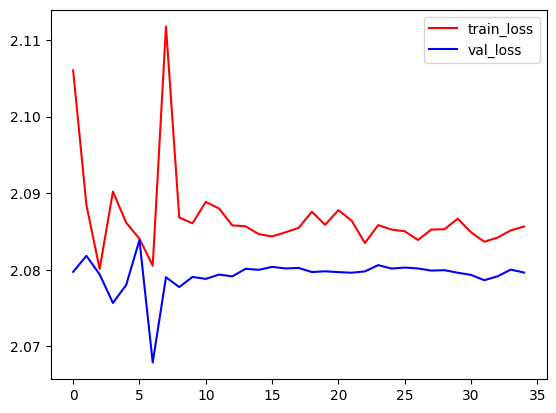

In [37]:
#Define Alexnet
del Alexnet_model
# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='relu', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(614, activation = 'relu'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))
# compile the model with a loss funciton, a metric and and optimizqation method with different learning rate
opt = SGD(learning_rate=  0.1)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 35**

Epoch 1/35
45/45 [==============================] - 4s 69ms/step - loss: 2.0808 - accuracy: 0.1111 - val_loss: 2.0793 - val_accuracy: 0.1333
Epoch 2/35
45/45 [==============================] - 3s 64ms/step - loss: 2.0802 - accuracy: 0.1083 - val_loss: 2.0792 - val_accuracy: 0.1333
Epoch 3/35
45/45 [==============================] - 3s 63ms/step - loss: 2.0799 - accuracy: 0.1083 - val_loss: 2.0792 - val_accuracy: 0.1333
Epoch 4/35
45/45 [==============================] - 3s 62ms/step - loss: 2.0801 - accuracy: 0.1028 - val_loss: 2.0791 - val_accuracy: 0.1333
Epoch 5/35
45/45 [==============================] - 3s 64ms/step - loss: 2.0798 - accuracy: 0.1111 - val_loss: 2.0791 - val_accuracy: 0.1333
Epoch 6/35
45/45 [==============================] - 3s 62ms/step - loss: 2.0798 - accuracy: 0.1111 - val_loss: 2.0790 - val_accuracy: 0.1111
Epoch 7/35
45/45 [==============================] - 3s 65ms/step - loss: 2.0794 - accuracy: 0.1250 - val_loss: 2.0789 - val_accuracy: 0.1333
Epoch 8/35
45

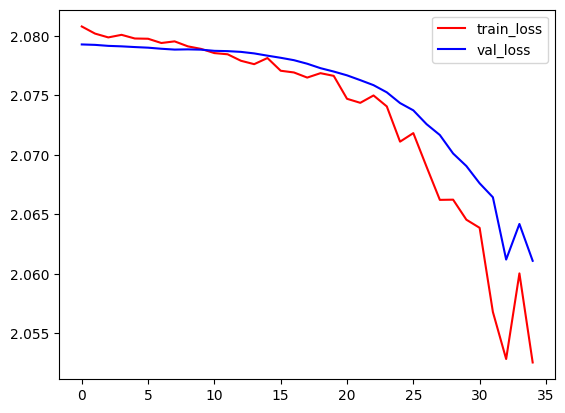

In [38]:
#Define Alexnet
#change activation function relu -> swish
del Alexnet_model
# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='swish', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'swish'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(614, activation = 'swish'))
Alexnet_model.add(Dropout(0.5))
Alexnet_model.add(Dense(8, activation = 'softmax'))
# compile the model with a loss funciton, a metric and and optimizqation method
opt = SGD(learning_rate=  0.01)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 36**

Epoch 1/35
45/45 [==============================] - 3s 64ms/step - loss: 2.0911 - accuracy: 0.1028 - val_loss: 2.0741 - val_accuracy: 0.2000
Epoch 2/35
45/45 [==============================] - 3s 62ms/step - loss: 2.0766 - accuracy: 0.1361 - val_loss: 2.0690 - val_accuracy: 0.2222
Epoch 3/35
45/45 [==============================] - 3s 62ms/step - loss: 2.0624 - accuracy: 0.1528 - val_loss: 2.0706 - val_accuracy: 0.1556
Epoch 4/35
45/45 [==============================] - 3s 62ms/step - loss: 2.0530 - accuracy: 0.1806 - val_loss: 2.0612 - val_accuracy: 0.0889
Epoch 5/35
45/45 [==============================] - 3s 62ms/step - loss: 2.0443 - accuracy: 0.1750 - val_loss: 2.0609 - val_accuracy: 0.2000
Epoch 6/35
45/45 [==============================] - 3s 63ms/step - loss: 2.0176 - accuracy: 0.1917 - val_loss: 2.0917 - val_accuracy: 0.1556
Epoch 7/35
45/45 [==============================] - 3s 63ms/step - loss: 2.0205 - accuracy: 0.1972 - val_loss: 2.0912 - val_accuracy: 0.1556
Epoch 8/35
45

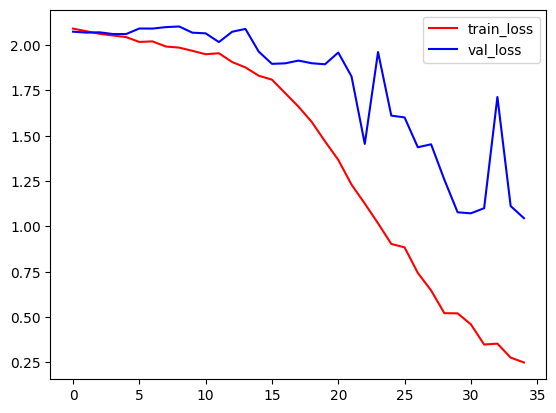

In [40]:
#Define Alexnet
del Alexnet_model
# Initialize the model
Alexnet_model = Sequential()

# layer 1: convolutional layer + max-pooling layer
Alexnet_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                  activation='relu', input_shape = (128,128,3)))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layer 2: convolutional layer + max-pooling layer 
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 3-5: three convolutional layers + 1 max-pooling layer
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  activation = 'relu'))
Alexnet_model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
Alexnet_model.add(Flatten())
Alexnet_model.add(Dense(8, activation = 'softmax'))

# compile the model with a loss funciton, a metric and and optimizqation method
opt = SGD(learning_rate=  0.01)
Alexnet_model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])
train(Alexnet_model,x_train,x_val,y_train,y_val,epochs=35,batch_size=8)

**Figure 37**

# Comments and Discussions 

* Generate 2D gray images, I create a bash file so draw shapes automaticly. I saved in dataset folder and the folder has subfolder corresponfing to labels. There is a problem with size. When i tried to get images widht and high respectvily 128*128 px. The shapes is not center of the image. I solved problem with  center cropped images. So i created image bigger size much more black areas. Applied center crop so i get much more contains shape. You can see implemetenetion in createDataset funciton. The other function is adding noise. The function add randomly noise to pixel. Our problem is multiclass classification so i implement one hot decoder. Finished preprocessing steps i implemented Alexnet model.
I trained the first model with default parameters. In the training and validation loss graph, although there were points where they intersected, it was observed that they decreased at the same rate. However, at one point, while the training loss continued to decrease, the validation loss started to increase, indicating that the model was tending to overfit.
When setting the learning rate to 0.1 and training the model, it is clear from the loss graph that the model did not learn effectively. The AlexNet uses the ReLU function as the default parameter for activation function. In the next step, I replaced the ReLU function with the Swish function. Although it had a better effect in the previous problem, it failed to yield the same impact in our current problem. As evident from the model's graph, it is not able to learn effectively.
When I trained the model with the tanh activation function, the training loss was good, but it did not yield effective results in the validation. Overfitting was also observed in this case. When I tried reducing the density by 10% based on the steps we applied so far, it is evident from the losses that the model could not fit the problem effectively. Removing the last layers also resulted in the model underfitting.